### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.datasets
%matplotlib inline
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

## **Question 1**
Illustrate training Muculloh-pits neurons on a dataset (4 features) either using pen/paper or code.



### Loading The Data And Converting

In [ ]:
wine = sklearn.datasets.load_wine()
data = pd.DataFrame(wine.data, columns = wine.feature_names)
data["Class"] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


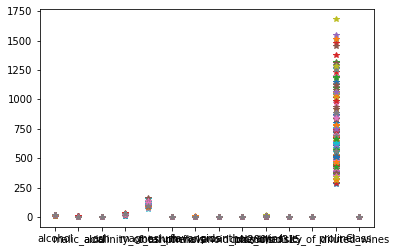

In [ ]:
plt.plot(data.T,'*')
plt.show()

### Spliting Data Into Independent And Target Values

In [ ]:
x = data.drop('Class',axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3, stratify = y)

### Plotting The Graph

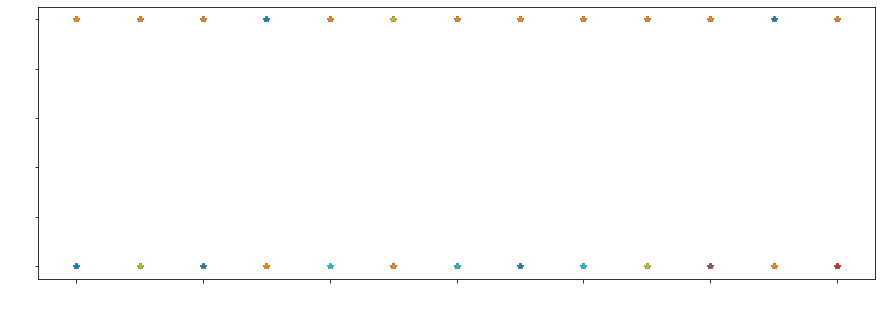

In [ ]:
x_train_binarized = x_train.apply(pd.cut, bins = 2, labels = [1,0]).values
x_test_binarized = x_test.apply(pd.cut, bins = 2, labels = [1,0]).values
 
plt.figure(figsize=(15,5))
plt.plot(x_train_binarized.T,'*')
plt.xticks(rotation='vertical',c='white',size=15)
plt.yticks(c='white',size=15)
plt.show()

### MP Neuron Code

In [ ]:
class MP_Neuron:
  #intializing the parameter value to 0
  def __init__(self):
    self.b = 0
  #defining the model
  def Model(self,x):
    return np.sum(x)>=self.b
  #optimising algorithm
  def fit(self,x,y):
    #for storing accuracies for differnt value of b
    accuracy = {}
    #since the range of b is from [0,n]
    for b in range(x.shape[1] + 1):
      self.b = b
      yhat = []
      for row in x:
          yhat.append(self.Model(row)) 
      accuracy[b] = accuracy_score(yhat,y)
    best_b = max(accuracy,key = accuracy.get)
    self.b = best_b
    return [accuracy,best_b,accuracy[best_b]]
  def predict(self,x,y):
    yhat = []
    for row in x:
      yhat.append(self.Model(row))
    accuracy = accuracy_score(y,yhat)
    return accuracy

In [ ]:
neuron = MP_Neuron()
accuracy, best_b, accuracy_model = neuron.fit(x_train_binarized, y_train)
print("The optimal value of b :", best_b)
print("accuracy_model on training data :", accuracy_model*100)

The optimal value of b : 9
accuracy_model on training data : 59.859154929577464


### Plotting Accuracy

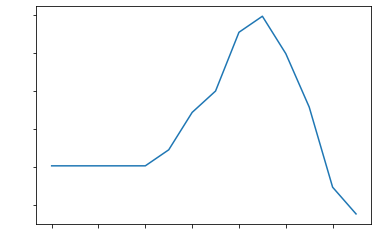

In [ ]:
#since accuracy is a dictionary,
#we convert into list for plotting
accuracies = list(accuracy.values())
plt.plot(accuracies)
plt.xticks(c='white')
plt.yticks(c='white')
plt.show()

### Testing Model

In [ ]:
accuracy = neuron.predict(x_test_binarized,y_test)
print("The accuracy of model on test data is :",accuracy*100)

The accuracy of model on test data is : 58.333333333333336


## **Question 2**
Illustrate training Perceptron on a dataset (UCI, Kaggle) either using pen/paper or code.



## Perceptron

In [ ]:
class Perceptron:
    
    def __init__(self, add_bias=True, max_iters=10000, record_updates=False):
        self.max_iters = max_iters
        self.add_bias = add_bias
        self.record_updates = record_updates
        if record_updates:
            self.w_hist = [] 
            self.n_hist = [] 
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w = np.zeros(D)                               
        if self.record_updates:
            w_hist = [w] 
        y = 2*y - 1                                     
        t = 0
        change = True                                 
        while change and t < self.max_iters:
            change = False
            for n in np.random.permutation(N):
                yh = np.sign(np.dot(x[n,:], w))       
                if yh == y[n]: 
                    continue                           
                w = w + y[n]*x[n,:]
                if self.record_updates:
                    self.w_hist.append(w)
                    self.n_hist.append(n)
                change = True
                t += 1
                if t >= self.max_iters:
                    break
        if change:
            print(f'did not converge after {t} updates')
        else:
            print(f'converged after {t} iterations!')
        self.w = w
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = np.sign(np.dot(self.w, x))
        return (yh + 1)//2                      

### Applying It On A Binary

In [ ]:
dataset = sklearn.datasets.load_iris()
x, y = dataset['data'][:,2:], dataset['target']
x, y = x[y < 2, :], y[y< 2]

model = Perceptron(record_updates=True)
yh = model.fit(x,y)

converged after 7 iterations!


### Plotting Decision Boundary

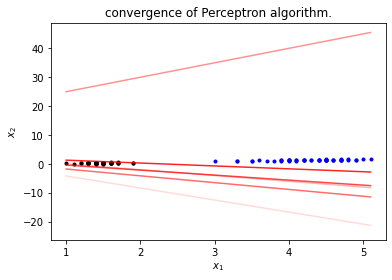

In [ ]:
plt.plot(x[y==0,0], x[y==0,1], 'k.' )
plt.plot(x[y==1,0], x[y==1,1], 'b.' )
x_line = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
for t,w in enumerate(model.w_hist):
    coef = -w[0]/w[1]                                    
    plt.plot(x_line, coef*x_line - w[2]/w[1], 'r-', 
             alpha=t/len(model.w_hist), label=f't={t}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('convergence of Perceptron algorithm.')
plt.show()

### Applying It On Non Linear

did not converge after 10000 updates


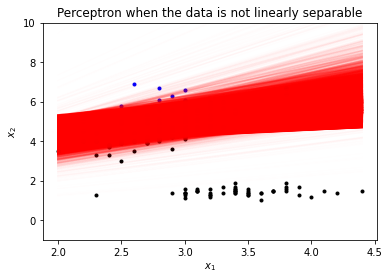

In [ ]:
dataset = sklearn.datasets.load_iris()
x, y = dataset['data'][:,[1,2]], dataset['target']
y =  y > 1
model = Perceptron(record_updates=True)
yh = model.fit(x,y)
plt.plot(x[y==0,0], x[y==0,1], 'k.' )
plt.plot(x[y==1,0], x[y==1,1], 'b.' )
x_line = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
for t,w in enumerate(model.w_hist):
    coef = -w[0]/w[1]
    plt.plot(x_line, coef*x_line - w[2]/w[1], 'r-', alpha=t/len(model.w_hist), label=f't={t}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.ylim(-1,10)
plt.title('Perceptron when the data is not linearly separable')
plt.show()